In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import functions as fn
import selfies as sf
#import random
#import rdkit
#from rdkit import Chem
#from rdkit.Chem.rdMolDescriptors import CalcMolFormula, CalcExactMolWt
#from molmass import Formula
import mutations as mut
from functools import partial
import metrics as met
import pandas as pd
#import copy
import numpy as np
import functions as fn
#import seaborn as sns

#just a 'fancy' printing function to separate outputs
def line(string=''):
    print(f"-------{string}-------")

# smiles
benzene = "c1ccccc1" 
cysteine = "C([C@@H](C(=O)O)N)S"
caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
mdma = "CC(NC)CC1=CC=C(OCO2)C2=C1"
_12dibromobenzene = "Brc1ccccc1Br"
_13dibromobenzene = "Brc1cccc(Br)c1"
_14dibromobenzene = "Brc1ccc(Br)cc1"
_15dibromobenzene = "Brc1cc(Br)ccc1"
_16dibromobenzene = "Brc1c(Br)cccc1"
cholesterol = "CC(CCCC(C1CCC2C1(C)CCC1C2CC=C2C1(C)CCC(C2)O)C)C"

benzene_sf = sf.encoder(benzene)  # [C][=C][C][=C][C][=C][Ring1][=Branch1]


#def test(variable): #TODO a function that prints a var.'s name and value, for debugging
#    print([ i for i, a in locals().items() if a == variable][0],": ",variable

print(sf.encoder(fn.canonicalize_smiles(mdma))+"\n"+sf.encoder(fn.canonicalize_smiles(cholesterol)))
print((fn.canonicalize_smiles(mdma))+"\n"+(fn.canonicalize_smiles(cholesterol)))

c:\Users\marti\anaconda3\envs\thesis_3.8\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[C][N][C][Branch1][C][C][C][C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][=Branch1][O][C][O][Ring1][=Branch1]
[C][C][Branch1][C][C][C][C][C][C][Branch1][C][C][C][C][C][C][C][C][C][=C][C][C][Branch1][C][O][C][C][C][Ring1][#Branch1][Branch1][C][C][C][Ring1][N][C][C][C][Ring2][Ring1][Ring1][Ring1][S][C]
CNC(C)Cc1ccc2c(c1)OCO2
CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


In [3]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df) 

import functions as fn

print(fn.column_to_list(df,"calories"))

   calories  duration
0       420        50
1       380        40
2       390        45
[420, 380, 390]


In [4]:
n = 12
m = 3
print(f"{n//m} ; {n%m}")

4 ; 0


In [5]:
import random

colors = ['red', 'blue', 'white', 'green']
probabilities = [0.5, 0.25, 0.125, 0.125]
chosen_color = random.choices(colors, weights=probabilities, k=100)
print(chosen_color)

for c in colors:
    print(f"{c}: {chosen_color.count(c)}")

['blue', 'red', 'white', 'white', 'white', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'white', 'red', 'red', 'white', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red', 'green', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'green', 'green', 'red', 'red', 'green', 'red', 'blue', 'red', 'green', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'white', 'red', 'red', 'green', 'red', 'white', 'red', 'green', 'red', 'white', 'red', 'green', 'red', 'red', 'green', 'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'white', 'white', 'white', 'blue', 'red', 'blue', 'green', 'green', 'white', 'red', 'blue', 'green']
red: 50
blue: 23
white: 12
green: 15


In [6]:
import pandas as pd

def transform_to_dataframe(data, column_names):
    df = pd.DataFrame(data, columns=column_names)
    return df


In [7]:
import pandas as pd

def lists_to_dataframe(data, column_names):
    # Check if data and column_names have same length
    if len(data) != len(column_names):
        raise ValueError('Number of columns in data does not match number of column names')

    # Create a dictionary with column names as keys and columns data as values
    data_dict = {column_name: column_data for column_name, column_data in zip(column_names, data)}

    # Create pandas DataFrame from dictionary
    df = pd.DataFrame(data_dict)

    return df

In [8]:



data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
column_names = ['A', 'B', 'C']

df = transform_to_dataframe(data, column_names)
print(df)

df = lists_to_dataframe(data, column_names)
print(df)


   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


In [9]:
['a']*5


['a', 'a', 'a', 'a', 'a']

In [10]:
len(sf.get_semantic_robust_alphabet())

69

In [11]:
all_sym = sf.get_semantic_robust_alphabet()
transatable = []
for sym in all_sym:
    if sf.decoder(sym) != '':
        transatable.append(sym)

#[ expression for item in list if conditional ]
transatable = [sym for sym in all_sym if sf.decoder(sym) != '']
untranslatable = list(all_sym-set(transatable))


In [12]:
untranslatable

['[Branch3]',
 '[=Branch2]',
 '[=Ring1]',
 '[Ring3]',
 '[Ring1]',
 '[Ring2]',
 '[=Branch3]',
 '[Branch1]',
 '[#Branch3]',
 '[=Ring2]',
 '[#Branch1]',
 '[Branch2]',
 '[=Ring3]',
 '[=Branch1]',
 '[#Branch2]']

In [13]:
import os
import pandas as pd
os.getcwd()



'c:\\Users\\marti\\Desktop\\__SKOLA_VU\\__THESIS\\repo\\lead-optimization-pipeline\\pipeline'

In [14]:
from rdkit.Chem import Draw
import selfies as sf
from rdkit import Chem
from rdkit.Chem import rdFMCS

In [15]:


def find_common_substructure(smiles1, smiles2):
    # Convert SMILES strings to RDKit Mol objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    
    # Check if molecules were correctly created
    if not mol1 or not mol2:
        raise ValueError("Invalid SMILES string provided")
    
    # Find the maximum common substructure
    mcs_result = rdFMCS.FindMCS([mol1, mol2])
    
    # Convert the MCS result to a molecule and then to a SMILES string
    mcs_mol = Chem.MolFromSmarts(mcs_result.smartsString)
    mcs_smiles = Chem.MolToSmiles(mcs_mol)
    
    return mcs_smiles


In [16]:
smiles1 = "CCO"
smiles2 = "CCN"
print(find_common_substructure(smiles1, smiles2))  # Will output "CC"


CC


In [17]:
cycles = ["CNC(Cc1ccc2c(c1)OCO2)P",
          "CNC(C1CCCCCCCCCCCCCCCC1)P",
          "CNC(P)CC1=CC=C2C(=C1)OCO2",
          ] 

lcs = (find_common_substructure(cycles[2], cycles[1]))
print(lcs)

C:C:C:C:C:CCC(P)NC


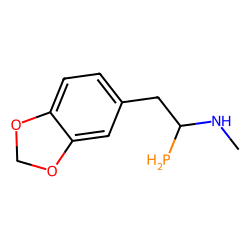

CNC(P)CC1=CC=C2C(=C1)OCO2
CNC(P)CC1=CC=C2C(=C1)OCO2
[C][N][C][Branch1][C][P][C][C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][=Branch1][O][C][O][Ring1][=Branch1]



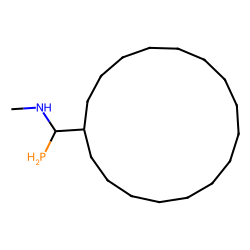

CNC(C1CCCCCCCCCCCCCCCC1)P
CNC(C1CCCCCCCCCCCCCCCC1)P
[C][N][C][Branch2][Ring1][Ring2][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][Ring1][P][P]



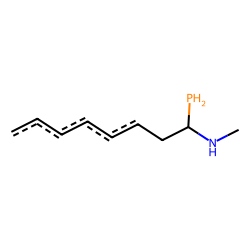

C:C:C:C:C:CCC(P)NC
C=CC=CC=CCC(P)NC
[C][=C][C][=C][C][=C][C][C][Branch1][C][P][N][C]



In [18]:

def draw_annotate(chem_lst: list):
    for chem in chem_lst:
        img = Draw.MolsToGridImage([Chem.MolFromSmiles(chem)], 
                           molsPerRow=1, 
                           subImgSize=(250, 250), 
                           maxMols=len(chem_lst),
                           legends=None)
        display(img)
        print(f"{chem}\n{sf.decoder(sf.encoder(chem))}\n{sf.encoder(chem)}\n")
draw_annotate([cycles[2],cycles[1],lcs])

In [19]:
from rdkit import Chem
from rdkit.Chem import rdFMCS

def crossover(mol1, mol2):
    # Convert the SMILES strings to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(mol1)
    mol2 = Chem.MolFromSmiles(mol2)

    # Find the maximum common substructure
    mcs = rdFMCS.FindMCS([mol1, mol2])

    # Check if a common substructure was found
    if not mcs.smartsString:
        return []

    # Convert the common substructure to a molecule object
    substructure = Chem.MolFromSmarts(mcs.smartsString)

    # Replace the common substructure with a wildcard atom
    mol1 = Chem.ReplaceSubstructs(mol1, substructure, Chem.MolFromSmiles('*'))
    mol2 = Chem.ReplaceSubstructs(mol2, substructure, Chem.MolFromSmiles('*'))

    # Create the crossed-over molecules
    crossed_over = []
    for mol1_fragment in mol1:
        for mol2_fragment in mol2:
            crossed_over.append(Chem.MolToSmiles(Chem.CombineMols(mol1_fragment, mol2_fragment)))

    return crossed_over


In [20]:
output = crossover(cycles[2], cycles[1])
output

['*.*.CCCCCCCCCC.OCO', '*.*.CCCCCCCCCC.OCO']

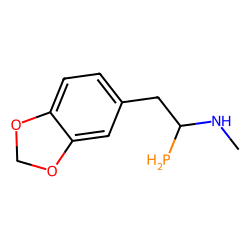

CNC(P)CC1=CC=C2C(=C1)OCO2
CNC(P)CC1=CC=C2C(=C1)OCO2
[C][N][C][Branch1][C][P][C][C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][=Branch1][O][C][O][Ring1][=Branch1]



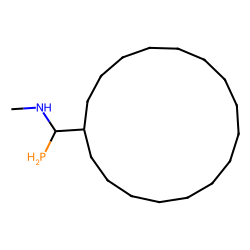

CNC(C1CCCCCCCCCCCCCCCC1)P
CNC(C1CCCCCCCCCCCCCCCC1)P
[C][N][C][Branch2][Ring1][Ring2][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][Ring1][P][P]



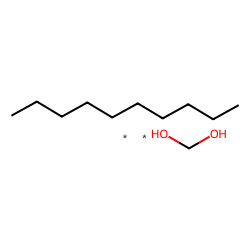

In [21]:
try:
    draw_annotate([cycles[2],cycles[1],output[0],output[1]])
except:
    pass

In [22]:
from rdkit import Chem
from rdkit.Chem import rdFMCS

def crossover_molecules(molecule1, molecule2):
    # Convert SMILES strings to molecule objects
    mol1 = Chem.MolFromSmiles(molecule1)
    mol2 = Chem.MolFromSmiles(molecule2)
    
    # Find common substructure
    mcs = rdFMCS.FindMCS([mol1, mol2])
    
    if mcs.numAtoms == 0:  # If no common substructure, return original molecules
        return [molecule1, molecule2]

    # Get substructure as a molecule object
    substructure = Chem.MolFromSmarts(mcs.smartsString)

    # Extract fragments surrounding the substructure
    fragments1 = Chem.GetMolFrags(Chem.DeleteSubstructs(mol1, substructure), asMols=True)
    fragments2 = Chem.GetMolFrags(Chem.DeleteSubstructs(mol2, substructure), asMols=True)

    # Swap fragments and recombine molecules
    crossed_molecules = []

    for frag1 in fragments1:
        for frag2 in fragments2:
            # Combine common substructure with swapped fragments
            new_mol1 = Chem.MolFromSmiles(Chem.MolToSmiles(substructure) + '.' + Chem.MolToSmiles(frag2))
            new_mol2 = Chem.MolFromSmiles(Chem.MolToSmiles(substructure) + '.' + Chem.MolToSmiles(frag1))

            crossed_molecules.append(Chem.MolToSmiles(new_mol1))
            crossed_molecules.append(Chem.MolToSmiles(new_mol2))

    return crossed_molecules



In [23]:
output = crossover_molecules(cycles[2], cycles[1])
output

['C:C:C:C:C:CCC(P)NC.CCCC', 'C:C:C:C:C:CCC(P)NC.OCO']

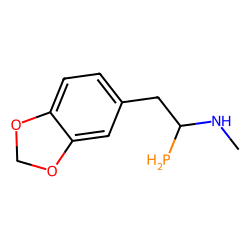

CNC(P)CC1=CC=C2C(=C1)OCO2
CNC(P)CC1=CC=C2C(=C1)OCO2
[C][N][C][Branch1][C][P][C][C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][=Branch1][O][C][O][Ring1][=Branch1]



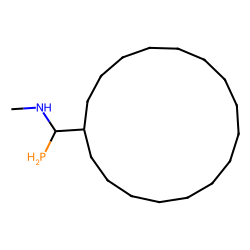

CNC(C1CCCCCCCCCCCCCCCC1)P
CNC(C1CCCCCCCCCCCCCCCC1)P
[C][N][C][Branch2][Ring1][Ring2][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][Ring1][P][P]



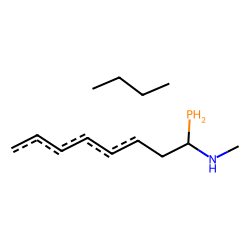

C:C:C:C:C:CCC(P)NC.CCCC
C=CC=CC=CCC(P)NC.CCCC
[C][=C][C][=C][C][=C][C][C][Branch1][C][P][N][C].[C][C][C][C]



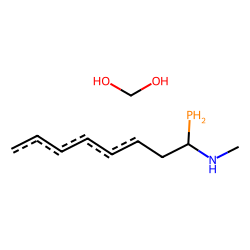

C:C:C:C:C:CCC(P)NC.OCO
C=CC=CC=CCC(P)NC.OCO
[C][=C][C][=C][C][=C][C][C][Branch1][C][P][N][C].[O][C][O]



In [24]:
try:
    draw_annotate([cycles[2],cycles[1],output[0],output[1]])
except:
    pass

In [25]:
import rdkit.Chem as Chem
from rdkit.Chem import rdFMCS
import random

def crossover_molecules2(smiles1, smiles2):
    # Convert the SMILES strings to RDKit's molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Find the maximum common substructure between the two molecules
    mcs = rdFMCS.FindMCS([mol1, mol2])

    # If no common substructure is found, return an empty list
    if mcs.canceled or mcs.numAtoms == 0:
        return []

    # Get the common substructure as a molecule object
    substructure = Chem.MolFromSmarts(mcs.smartsString)

    # Split the molecules into two halves
    mol1_split = Chem.ReplaceSubstructs(mol1, substructure, Chem.MolFromSmiles('[*:1]'), replacementConnectionPoint=0)
    mol2_split = Chem.ReplaceSubstructs(mol2, substructure, Chem.MolFromSmiles('[*:1]'), replacementConnectionPoint=0)

    # Combine the halves in all possible ways
    combinations = [Chem.MolToSmiles(Chem.CombineMols(mol1_half, mol2_half), isomericSmiles=True) for mol1_half in mol1_split for mol2_half in mol2_split]

    return combinations




In [26]:

output = (crossover_molecules2(cycles[2], cycles[1]))
output

['CCCCCCCCCC.OCO.[*:1].[*:1]', 'CCCCCCCCCC.OCO.[*:1].[*:1]']

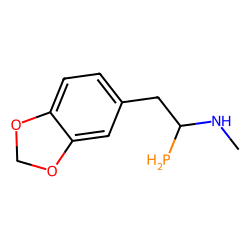

CNC(P)CC1=CC=C2C(=C1)OCO2
CNC(P)CC1=CC=C2C(=C1)OCO2
[C][N][C][Branch1][C][P][C][C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][=Branch1][O][C][O][Ring1][=Branch1]



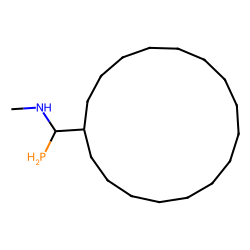

CNC(C1CCCCCCCCCCCCCCCC1)P
CNC(C1CCCCCCCCCCCCCCCC1)P
[C][N][C][Branch2][Ring1][Ring2][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][Ring1][P][P]



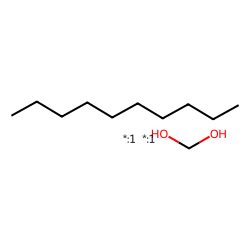

In [27]:
try:
    draw_annotate([cycles[2],cycles[1],output[0],output[1]])
except:
    pass

['*.*C(C)NC.OCO']


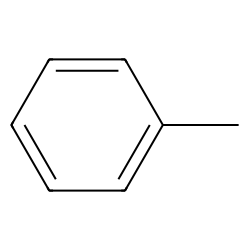

Cc1ccccc1
CC1=CC=CC=C1
[C][C][=C][C][=C][C][=C][Ring1][=Branch1]



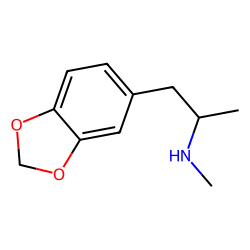

CNC(Cc1ccc2c(c1)OCO2)C
CNC(CC1=CC=C2C(=C1)OCO2)C
[C][N][C][Branch1][P][C][C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][=Branch1][O][C][O][Ring1][=Branch1][C]



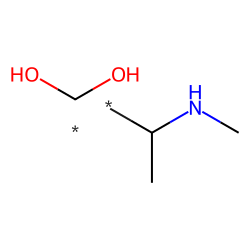

In [29]:
molecules = ["Cc1ccccc1", "CNC(Cc1ccc2c(c1)OCO2)C"]


output = (crossover(molecules[0], molecules[1]))
print(output)

merge = []
merge.extend(molecules)
merge.extend(output)
try:
    draw_annotate(merge)
except:
    pass

In [30]:
from rdkit import Chem
from rdkit.Chem import rdRGroupDecomposition as rdRGD
from selfies import encoder, decoder
from typing import List

def find_common_substructures(mol1, mol2):
    # Generate the R-Group decomposition (common substructures)
    rgd = rdRGD.RGroupDecomposition([mol1, mol2])

    common_substructures = []

    # Loop over each molecule in the dataset
    for molecule in [mol1, mol2]:
        # Add the molecule to the R-Group decomposition
        match = rgd.Add(molecule)

        # If the molecule matches the R-Group decomposition
        if match >= 0:
            common_substructures.append(rgd.GetRGroupsAsColumns())

    return common_substructures

def crossover_self(mol1: str, mol2: str) -> List[str]:
    mol1_rdkit = Chem.MolFromSmiles(decoder(mol1))
    mol2_rdkit = Chem.MolFromSmiles(decoder(mol2))

    common_substructures = find_common_substructures(mol1_rdkit, mol2_rdkit)

    result_molecules = []
    print(common_substructures)
    # Perform the crossover
    for i in range(len(common_substructures[0])):
        new_mol1 = Chem.ReplaceSubstructs(mol1_rdkit, common_substructures[0][i], common_substructures[1][i])
        new_mol2 = Chem.ReplaceSubstructs(mol2_rdkit, common_substructures[1][i], common_substructures[0][i])

        result_molecules.append(encoder(Chem.MolToSmiles(new_mol1[0])))
        result_molecules.append(encoder(Chem.MolToSmiles(new_mol2[0])))

    return result_molecules


In [33]:
try:
    crossover_self(sf.encoder(molecules[0]),sf.encoder(molecules[1]))
except:
    pass

[{'Core': [<rdkit.Chem.rdchem.Mol object at 0x000002159704C820>]}, {'Core': [<rdkit.Chem.rdchem.Mol object at 0x000002159704C740>, <rdkit.Chem.rdchem.Mol object at 0x000002159704C890>]}]


In [34]:
vars = {}
time_timeout = 1000
min_number_atoms_matched = 3


vars["max_time_mcs_prescreen"] = time_timeout
vars["min_atom_match_mcs"] = min_number_atoms_matched
vars["filter_object_dict"] = None

vars

{'max_time_mcs_prescreen': 1000,
 'min_atom_match_mcs': 3,
 'filter_object_dict': None}

In [35]:
vars

{'max_time_mcs_prescreen': 1000,
 'min_atom_match_mcs': 3,
 'filter_object_dict': None}

In [36]:
from constants import *


In [37]:
def chemical_path(selfies1, selfies2):
    sf_lst1 = list(sf.split_selfies(selfies1))
    sf_lst2 = list(sf.split_selfies(selfies2)
)
    sf_lst1_len = len(sf_lst1)
    sf_lst2_len = len(sf_lst2)
    
    if sf_lst1_len>sf_lst2_len:
        sf_lst2.extend(['[nop]']*(sf_lst1_len-sf_lst2_len))
    elif sf_lst2_len>sf_lst1_len:
        sf_lst1.extend(['[nop]']*(sf_lst2_len-sf_lst1_len))

    chem_path = [sf.decoder(selfies1)]
    for sym_i in range(sf_lst1_len):
        sf_lst1[sym_i] = sf_lst2[sym_i]
        chem_path.append(sf.decoder(''.join(sf_lst1)))

    return chem_path

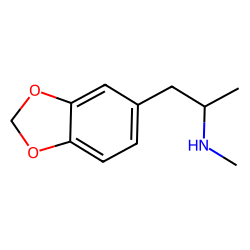

CC(NC)CC1=CC=C(OCO2)C2=C1
CC(NC)CC1=CC=C(OCO2)C2=C1
[C][C][Branch1][Ring1][N][C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C][Ring1][=Branch2]



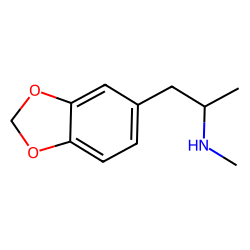

CC(NC)CC1=CC=C(OCO2)C2=C1
CC(NC)CC1=CC=C(OCO2)C2=C1
[C][C][Branch1][Ring1][N][C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C][Ring1][=Branch2]



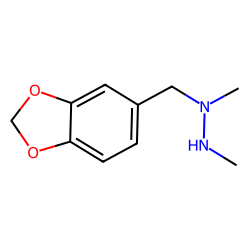

CN(NC)CC1=CC=C(OCO2)C2=C1
CN(NC)CC1=CC=C(OCO2)C2=C1
[C][N][Branch1][Ring1][N][C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C][Ring1][=Branch2]



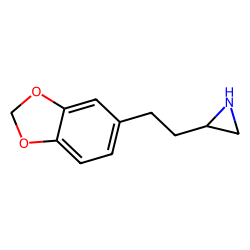

C1NC1CCC2=CC=C(OCO3)C3=C2
C1NC1CCC2=CC=C(OCO3)C3=C2
[C][N][C][Ring1][Ring1][C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C][Ring1][=Branch2]



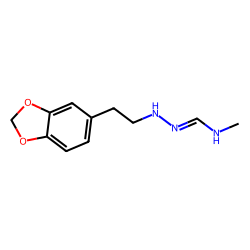

CNC=NNCCC1=CC=C(OCO2)C2=C1
CNC=NNCCC1=CC=C(OCO2)C2=C1
[C][N][C][=N][N][C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C][Ring1][=Branch2]



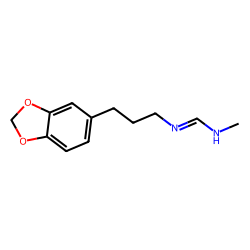

CNC=NCCCC1=CC=C(OCO2)C2=C1
CNC=NCCCC1=CC=C(OCO2)C2=C1
[C][N][C][=N][C][C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C][Ring1][=Branch2]



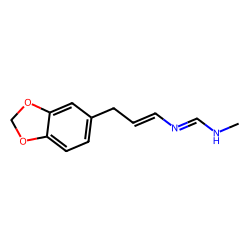

CNC=NC=CCC1=CC=C(OCO2)C2=C1
CNC=NC=CCC1=CC=C(OCO2)C2=C1
[C][N][C][=N][C][=C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C][Ring1][=Branch2]



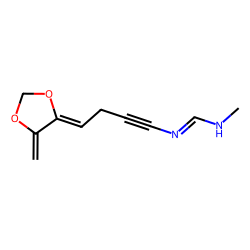

CNC=NC#CCC=C(OCO1)C1=C
CNC=NC#CCC=C(OCO1)C1=C
[C][N][C][=N][C][#C][C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C]



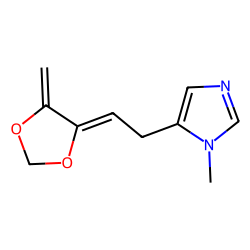

CN1C=NC=C1CC=C(OCO2)C2=C
CN1C=NC=C1CC=C(OCO2)C2=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C]



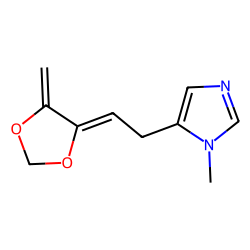

CN1C=NC=C1CC=C(OCO2)C2=C
CN1C=NC=C1CC=C(OCO2)C2=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C]



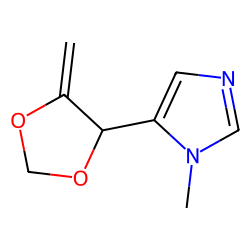

CN1C=NC=C1C(OCO2)C2=C
CN1C=NC=C1C(OCO2)C2=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][Branch1][Ring2][O][C][O][C][Ring1][C][=C]



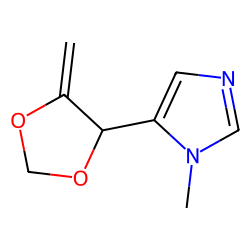

CN1C=NC=C1C(OCO2)C2=C
CN1C=NC=C1C(OCO2)C2=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][Branch1][Ring2][O][C][O][C][Ring1][C][=C]



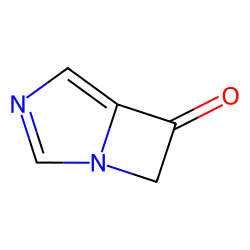

C1N2C=NC=C2C1=O
C1N2C=NC=C2C1=O
[C][N][C][=N][C][=C][Ring1][Branch1][C][Ring1][#Branch1][=O]



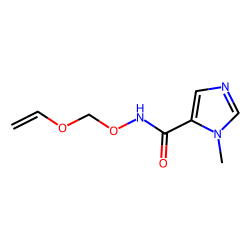

CN1C=NC=C1C(=O)NOCOC=C
CN1C=NC=C1C(=O)NOCOC=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][O][C][O][C][=C]



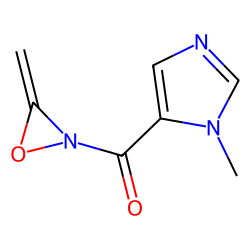

CN1C=NC=C1C(=O)N(O2)C2=C
CN1C=NC=C1C(=O)N(O2)C2=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][Branch1][C][O][C][Ring1][C][=C]



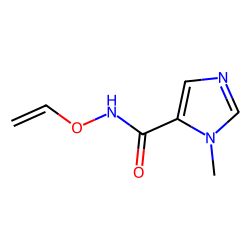

CN1C=NC=C1C(=O)NOC=C
CN1C=NC=C1C(=O)NOC=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][O][C][=C]



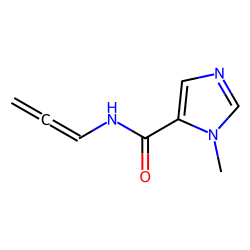

CN1C=NC=C1C(=O)NC=C=C
CN1C=NC=C1C(=O)NC=C=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][C][=C][=C]



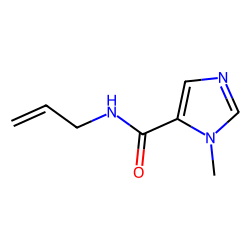

CN1C=NC=C1C(=O)NCC=C
CN1C=NC=C1C(=O)NCC=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][C][C][=C]



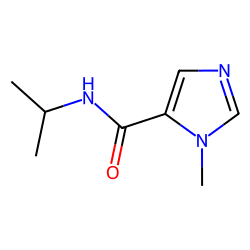

CN1C=NC=C1C(=O)NC(C)C
CN1C=NC=C1C(=O)NC(C)C
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][C][Branch1][C][C][C]



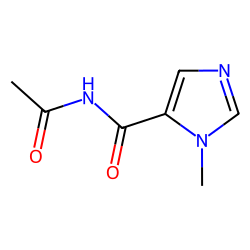

CN1C=NC=C1C(=O)NC(=O)C
CN1C=NC=C1C(=O)NC(=O)C
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][C][=Branch1][C][=O][C]



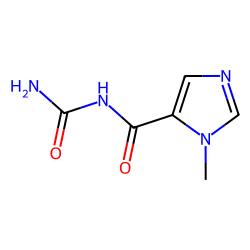

CN1C=NC=C1C(=O)NC(=O)N
CN1C=NC=C1C(=O)NC(=O)N
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][C][=Branch1][C][=O][N]



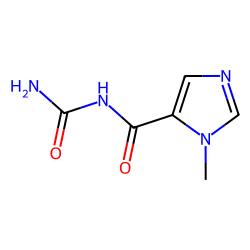

CN1C=NC=C1C(=O)NC(=O)N
CN1C=NC=C1C(=O)NC(=O)N
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][C][=Branch1][C][=O][N]



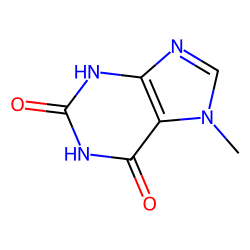

CN1C=NC2=C1C(=O)NC(=O)N2
CN1C=NC2=C1C(=O)NC(=O)N2
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][C][=Branch1][C][=O][N][Ring1][Branch2]



In [55]:
draw_annotate(chemical_path(sf.encoder(mdma),sf.encoder(caffeine)))

In [39]:
import crossovers as xo

In [44]:
print(xo.fingerprint_similarity('COCCC','CCCCC'))

0.2


In [41]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
import rdkit





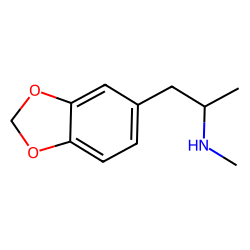

CC(NC)CC1=CC=C(OCO2)C2=C1
CC(NC)CC1=CC=C(OCO2)C2=C1
[C][C][Branch1][Ring1][N][C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C][Ring1][=Branch2]



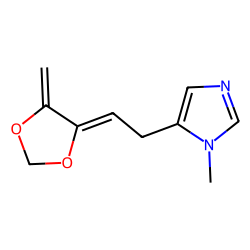

CN1C=NC=C1CC=C(OCO2)C2=C
CN1C=NC=C1CC=C(OCO2)C2=C
[C][N][C][=N][C][=C][Ring1][Branch1][C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C]



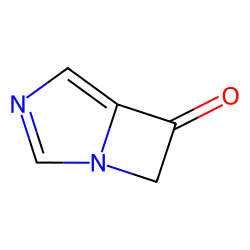

C1N2C=NC=C2C1=O
C1N2C=NC=C2C1=O
[C][N][C][=N][C][=C][Ring1][Branch1][C][Ring1][#Branch1][=O]



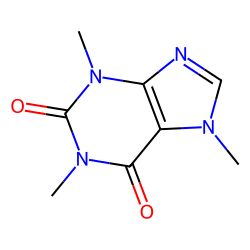

CN1C=NC2=C1C(=O)N(C(=O)N2C)C
CN1C=NC2=C1C(=O)N(C(=O)N2C)C
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][Branch1][=Branch2][C][=Branch1][C][=O][N][Ring1][Branch2][C][C]



In [53]:
draw_annotate([mdma,sf.decoder(xo.get_median_molecule(sf.encoder(mdma),sf.encoder(caffeine))),sf.decoder(xo.get_path_middle(sf.encoder(mdma),sf.encoder(caffeine))),caffeine])

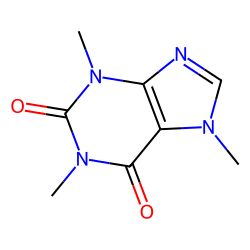

CN1C=NC2=C1C(=O)N(C(=O)N2C)C
CN1C=NC2=C1C(=O)N(C(=O)N2C)C
[C][N][C][=N][C][=C][Ring1][Branch1][C][=Branch1][C][=O][N][Branch1][=Branch2][C][=Branch1][C][=O][N][Ring1][Branch2][C][C]



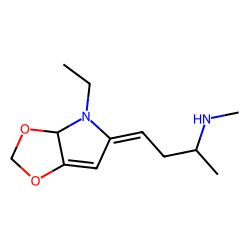

CC(NC)CC=C1C=C(OCO2)C2N1CC
CC(NC)CC=C1C=C(OCO2)C2N1CC
[C][C][Branch1][Ring1][N][C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][N][Ring1][Branch2][C][C]



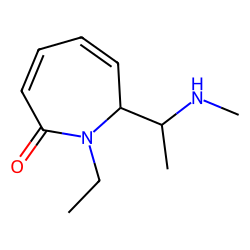

CC(NC)C1C=CC=CC(=O)N1CC
CC(NC)C1C=CC=CC(=O)N1CC
[C][C][Branch1][Ring1][N][C][C][C][=C][C][=C][C][=Branch1][C][=O][N][Ring1][Branch2][C][C]



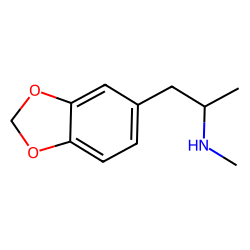

CC(NC)CC1=CC=C(OCO2)C2=C1
CC(NC)CC1=CC=C(OCO2)C2=C1
[C][C][Branch1][Ring1][N][C][C][C][=C][C][=C][Branch1][Ring2][O][C][O][C][Ring1][C][=C][Ring1][=Branch2]



In [63]:
draw_annotate([caffeine,sf.decoder(xo.get_median_molecule(sf.encoder(caffeine),sf.encoder(mdma))),sf.decoder(xo.get_path_middle(sf.encoder(caffeine),sf.encoder(mdma))),mdma])

In [56]:
def distribute_budget(b, i):
    # Create an array of weights in reverse order
    weights = list(range(i, 0, -1))

    # Normalize the weights so they sum up to 1
    norm_weights = [float(w) / sum(weights) for w in weights]

    # Calculate number of evaluations for each iteration based on the weights and the total budget
    num_evals = [int(b * w) for w in norm_weights]

    # Adjust the allocations to ensure the total budget is not exceeded due to rounding
    while sum(num_evals) > b:
        max_index = num_evals.index(max(num_evals))
        num_evals[max_index] -= 1

    # Check if we underused the budget due to rounding down and if so, add the difference to the first iteration
    if sum(num_evals) < b:
        num_evals[0] += b - sum(num_evals)

    return num_evals


In [62]:
distribute_budget(10000,20)

[962,
 904,
 857,
 809,
 761,
 714,
 666,
 619,
 571,
 523,
 476,
 428,
 380,
 333,
 285,
 238,
 190,
 142,
 95,
 47]

c:\Users\marti\anaconda3\envs\thesis_3.8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\marti\anaconda3\envs\thesis_3.8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\marti\anaconda3\envs\thesis_3.8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\marti\anaconda3\envs\thesis_3.8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layo

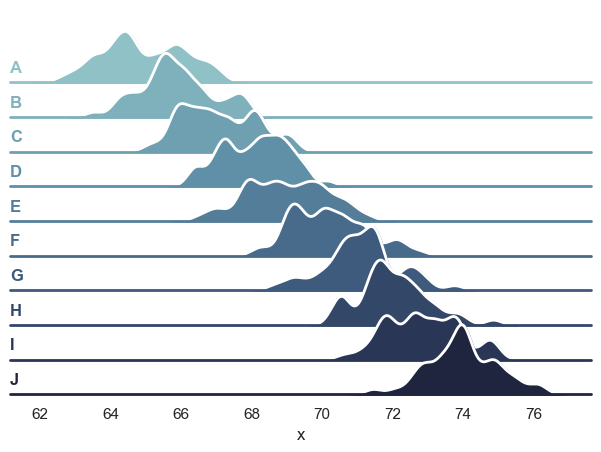

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.525)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [66]:
import selfies as sf
for i in range(10):
    print((sf.encoder(f'C1{(i+1)*"C"}C1')), i+3)
smn = (sf.encoder('C1CC1').split('[C]'))
new_list = [x for x in smn if x != '']
new_list[0]

[C][C][C][Ring1][Ring1] 3
[C][C][C][C][Ring1][Ring2] 4
[C][C][C][C][C][Ring1][Branch1] 5
[C][C][C][C][C][C][Ring1][=Branch1] 6
[C][C][C][C][C][C][C][Ring1][#Branch1] 7
[C][C][C][C][C][C][C][C][Ring1][Branch2] 8
[C][C][C][C][C][C][C][C][C][Ring1][=Branch2] 9
[C][C][C][C][C][C][C][C][C][C][Ring1][#Branch2] 10
[C][C][C][C][C][C][C][C][C][C][C][Ring1][O] 11
[C][C][C][C][C][C][C][C][C][C][C][C][Ring1][N] 12


'[Ring1][Ring1]'

In [1]:
def execute_code(code_string):
    exec(code_string)

# Example usage
python_code = '''
for i in range(5):
    print(i)
'''

execute_code(python_code)


0
1
2
3
4


In [58]:
from rdkit import Chem

def alternative_smiles(smiles_string):
    # convert SMILES string to an RDKit molecule
    mol = Chem.MolFromSmiles(smiles_string)

    if mol is None:
        raise ValueError("Invalid SMILES string")

    # get the canonical SMILES string of the molecule
    alt_smiles_string = Chem.MolToSmiles(mol, isomericSmiles=True)

    return alt_smiles_string

smiles_string = 'C1=CC=CC=C1CC(OC)C(COC2)COOCC2'  # input SMILES string, for benzene as an example
print(alternative_smiles(smiles_string))


COC(Cc1ccccc1)C1COCCCOOC1


In [65]:
import rdkit
def randomize_smiles(smiles_string, kek):
    # convert SMILES string to an RDKit molecule
    mol = Chem.MolFromSmiles(smiles_string)
    '''Returns a random (dearomatized) SMILES given an rdkit mol object of a molecule.
    Parameters:
    mol (rdkit.Chem.rdchem.Mol) :  RdKit mol object (None if invalid smile string smi)
    
    Returns:
    mol (rdkit.Chem.rdchem.Mol) : RdKit mol object  (None if invalid smile string smi)
    '''
    if not mol:
        return None
    if kek:
        Chem.Kekulize(mol)
    return rdkit.Chem.MolToSmiles(mol, canonical=False, doRandom=True, isomericSmiles=False,  kekuleSmiles=True) 

smiles_string = 'c1=Cc=Cc=C1CC(OC)C(COC2)COOCC2'  # input SMILES string, for benzene as an example
for i in range(20):
    print((randomize_smiles(smiles_string,False)))
for i in range(20):
    print((randomize_smiles(smiles_string,True)))

C1C(C(CC2C=CC=CC=2)OC)COCCCOO1
C1(C=CC=CC=1)CC(C1COOCCCOC1)OC
C1C=CC=C(C=1)CC(OC)C1COOCCCOC1
C(CC1C=CC=CC=1)(C1COCCCOOC1)OC
C1=CC=C(C=C1)CC(OC)C1COOCCCOC1
COC(C1COCCCOOC1)CC1=CC=CC=C1
C1C=CC=C(C=1)CC(OC)C1COCCCOOC1
O1CCCOOCC(C(OC)CC2C=CC=CC=2)C1
O1CCCOCC(CO1)C(OC)CC1=CC=CC=C1
C1OOCC(COCC1)C(CC1=CC=CC=C1)OC
O1OCC(C(OC)CC2=CC=CC=C2)COCCC1
C1OOCC(COCC1)C(OC)CC1=CC=CC=C1
C1C(CC(OC)C2COOCCCOC2)=CC=CC=1
C(C(C1COOCCCOC1)OC)C1=CC=CC=C1
C1=CC=CC(=C1)CC(OC)C1COOCCCOC1
C(CC1C=CC=CC=1)(OC)C1COOCCCOC1
C1OCC(C(OC)CC2C=CC=CC=2)COOCC1
C1CCOCC(C(CC2C=CC=CC=2)OC)COO1
C1CCOOCC(CO1)C(OC)CC1=CC=CC=C1
O1CC(COCCCO1)C(OC)CC1C=CC=CC=1
C1C(=CC=CC=1)CC(OC)C1COCCCOOC1
C1(COCCCOOC1)C(CC1C=CC=CC=1)OC
O(C(C1COOCCCOC1)CC1C=CC=CC=1)C
C1=CC=CC(CC(C2COOCCCOC2)OC)=C1
COC(CC1=CC=CC=C1)C1COCCCOOC1
O(C)C(C1COOCCCOC1)CC1C=CC=CC=1
C(C(C1COOCCCOC1)OC)C1=CC=CC=C1
O(C)C(CC1=CC=CC=C1)C1COCCCOOC1
C1OOCC(COCC1)C(OC)CC1=CC=CC=C1
C1COCC(C(CC2C=CC=CC=2)OC)COOC1
C1=CC=CC=C1CC(OC)C1COOCCCOC1
C1=C(C=CC=C1)CC(OC)C1COCCCOOC1
C1(C=CC=CC=1)C

In [67]:
def change_next_elements(lst):
    return [b if a == '[Ring1]' else x for x, a, b in zip(lst, [''] + lst, lst[1:] + [''])]
my_list = ['[Ring1]', 'A', '[Ring1]', 'B', 'C']
new_list = change_next_elements(my_list)
print(new_list)  # Output: ['[Ring1]', '[=Branch1]', '[Ring1]', '[=Branch1]', 'C']


['[Ring1]', '[Ring1]', '[Ring1]', 'C', 'C']


In [73]:
def change_next_elements(lst):
#    return [b for a,b in zip(lst,lst[1:])]
    return [lst[0]]+['[=Branch1]' if a == '[Ring1]' else b for a,b in zip(lst,lst[1:])]
    return [b if a == '[Ring1]' else x for x, a, b in zip(lst, [''] + lst, lst[1:] + [''])]
my_list = ['[Ring1]', 'A', '[Ring1]', 'B', 'C']
new_list = change_next_elements(my_list)
print(new_list)  # Output: ['[Ring1]', '[=Branch1]', '[Ring1]', '[=Branch1]', 'C']


['[Ring1]', '[=Branch1]', '[Ring1]', '[=Branch1]', 'C']


In [74]:
def change_next_elements(input_list):
    return ['[=Branch1]' if (input_list[i-1] == '[Ring1]' and i > 0) else v for i, v in enumerate(input_list)]
my_list = ['[Ring1]', 'A', '[Ring1]', 'B', 'C']
new_list = change_next_elements(my_list)
print(new_list)  # Output: ['[Ring1]', '[=Branch1]', '[Ring1]', '[=Branch1]', 'C']

['[Ring1]', '[=Branch1]', '[Ring1]', '[=Branch1]', 'C']


In [76]:
def change_elements(input_list):
    change_to_list = ['[Ring1]', '[Ring2]', '[Branch1]', '[=Branch1]']
    for i in range(len(input_list) - 1): # -1 to avoid index out of range error
        if input_list[i] == '[Ring1]' and input_list[i + 1] not in change_to_list:
            input_list[i + 1] = '[=Branch1]'
    return input_list
input_list = ['[Ring1]', 'A','a' ,'[Ring1]', '[Ring2]', '[Ring1]', '[Branch1]', '[Ring1]', 'B']
print(change_elements(input_list))


['[Ring1]', '[=Branch1]', 'a', '[Ring1]', '[Ring2]', '[Ring1]', '[Branch1]', '[Ring1]', '[=Branch1]']


In [83]:
from collections import Counter

def count_elements(lst):
    counts = Counter(lst)
    return dict(counts)

# Example usage
my_list = ['a',1, 2, 3, 2, 4, 1, 2, 3, 4, 4, 4,1,1,1,1,1,1,1,1,1,1,'a','a','a']
frequency_dict = count_elements(my_list)
print(frequency_dict)


{'a': 4, 1: 12, 2: 3, 3: 2, 4: 4}


In [85]:
def create_list_from_frequency_dict(freq_dict):
    result = []
    for element, count in freq_dict.items():
        result.extend([element] * count)
    return result

# Example usage
frequency_dict = {1: 20, 2: 3, 3: 2, 4: 4}
result = create_list_from_frequency_dict(frequency_dict)
print(result)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4]


In [91]:
def make_lists(freq_dict, other_vals):
    key_list = []
    val_list = []
    
    for (k, v), val in zip(freq_dict.items(), other_vals):
        key_list.extend([k]*v)
        val_list.extend([val]*v)
        
    return key_list, val_list

freq_dict = {'a':4, 'b':1, 'c':2}
other_vals = [0.55, 0.89, 0.01]

keys, vals = make_lists(freq_dict, other_vals)
print(keys)
print(vals)


['a', 'a', 'a', 'a', 'b', 'c', 'c']
[0.55, 0.55, 0.55, 0.55, 0.89, 0.01, 0.01]


In [2]:
import metrics as met 
met.get_obj(['CCN(C(C)=O)c1cccc(-c2ccnc3c(C#N)cnn23)c1'],"zale")
zaleplon = 'CCN(C(C)=O)c1cccc(-c2ccnc3c(C#N)cnn23)c1'

100%|██████████| 1/1 [00:00<00:00, 333.38it/s]

In [3]:
from src.objective.guacamol.get_objective import get_objective
get_objective([zaleplon],"zale").item()

100%|██████████| 1/1 [00:00<00:00, 333.52it/s]


0.4664987325668335

In [4]:
import torch

In [5]:
from src.objective.guacamol.utils.objective import smiles_to_desired_scores
torch.Tensor(smiles_to_desired_scores([zaleplon], 'zale')).to(torch.float32).unsqueeze(1).item()

100%|██████████| 1/1 [00:00<00:00, 333.46it/s]


0.4664987325668335

In [6]:
""" Get Guacamol objectives.

Source: https://github.com/BenevolentAI/guacamol/blob/master/guacamol/standard_benchmarks.py
"""

import math
import numpy as np

import networkx as nx

from tqdm import tqdm
from rdkit import Chem, DataStructs
from rdkit.Chem import Crippen, rdmolops
from rdkit.Chem.QED import qed
from rdkit.Chem.Fingerprints import FingerprintMols
from guacamol import standard_benchmarks

from src.objective.guacamol.utils.sascorer import calculateScore

med1 = standard_benchmarks.median_camphor_menthol()  # 'Median molecules 1'
med2 = standard_benchmarks.median_tadalafil_sildenafil()  # 'Median molecules 2',
pdop = standard_benchmarks.perindopril_rings()  # 'Perindopril MPO',
osmb = standard_benchmarks.hard_osimertinib()  # 'Osimertinib MPO',
adip = standard_benchmarks.amlodipine_rings()  # 'Amlodipine MPO'
siga = standard_benchmarks.sitagliptin_replacement()  # 'Sitagliptin MPO'
zale = standard_benchmarks.zaleplon_with_other_formula()  # 'Zaleplon MPO'
valt = standard_benchmarks.valsartan_smarts()  # 'Valsartan SMARTS',
dhop = standard_benchmarks.decoration_hop()  # 'Deco Hop'
shop = standard_benchmarks.scaffold_hop()  # Scaffold Hop'
rano= standard_benchmarks.ranolazine_mpo()  # 'Ranolazine MPO'
fexo = standard_benchmarks.hard_fexofenadine()  # 'Fexofenadine MPO'... 'make fexofenadine less greasy'


guacamol_objs = {"med1": med1, "pdop": pdop, "adip": adip, "rano": rano, "osmb": osmb, "siga": siga, "zale": zale,
                 "valt": valt, "med2": med2, "dhop": dhop, "shop": shop, 'fexo': fexo}


GUACAMOL_TASK_NAMES = [
    'med1', 'pdop', 'adip', 'rano', 'osmb', 'siga',
    'zale', 'valt', 'med2', 'dhop', 'shop', 'fexo'
]






func = standard_benchmarks.zaleplon_with_other_formula()
score = func.objective.score(zaleplon)
score


0.46649872118284835

In [7]:
import time

print(t1-t0)

In [17]:
t1 = time.time()
for _ in range(1):
    get_objective([zaleplon]*30000,"zale").tolist()
loop1 = time.time()-t1

100%|██████████| 30000/30000 [01:03<00:00, 469.75it/s]


In [18]:
t2 = time.time()
for _ in range(30000):
    standard_benchmarks.zaleplon_with_other_formula().objective.score(zaleplon)
loop2 = time.time()-t2

In [19]:
t3 = time.time()
standard_benchmarks.zaleplon_with_other_formula().objective.score_list([zaleplon]*30000)
loop3 = time.time()-t3

In [20]:
print(f"{loop1}\n{loop2}\n{loop3}")

63.87323236465454
64.8330066204071
54.40992712974548


In [21]:
print(f"{loop2/loop1}\n{loop3/loop1}")

1.0150262358772322
0.851842393369374


In [23]:
print(type(get_objective))

<class 'function'>
